# Project: Sales Data Analysis (Starter Notebook)

**Objective:** Example notebook to show how to explore a dataset, ask research questions, and visualize results.

## Folder structure
- `/data` : raw datasets (sample_sales.csv)
- `/notebooks` : Jupyter notebooks
- `/scripts` : helper scripts
- `/outputs` : figures and exported results

## How to run
1. Open this notebook in JupyterLab or Jupyter Notebook.
2. Install requirements: `pip install pandas matplotlib seaborn notebook`.

----


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PATH = Path('../data/sample_sales.csv')  # adjust if opened from /notebooks
df = pd.read_csv(DATA_PATH)
df.head()


,transaction_id,date,gross_sales,COGS,manufacturing_cost,freight_cost,net_sales,profit
0,1001,2023-01-01,1000.00,450.00,50,5,495.00,495.00
1,1002,2023-01-01,1623.45,780.55,60,7,775.90,775.90
2,1003,2023-01-01,2246.90,1111.11,70,9,1056.79,1056.79
3,1004,2023-01-04,1000.00,450.00,50,5,495.00,495.00
4,1005,2023-01-04,1623.45,780.55,60,7,775.90,775.90


## Quick EDA
- Check missing values
- Summary statistics
- Time series of gross and net sales


In [2]:
# Basic EDA
print('Shape:', df.shape)
print('\nMissing values:\n', df.isnull().sum())
display(df.describe())


Shape: (30, 8)

Missing values:
 transaction_id        0
date                  0
gross_sales           0
COGS                  0
manufacturing_cost    0
freight_cost          0
net_sales             0
profit                0
dtype: int64


,transaction_id,gross_sales,COGS,manufacturing_cost,freight_cost,net_sales,profit
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000
mean,1015.500000,1623.450000,780.553333,60.000000,7.00000,775.896667,775.896667
std,8.803408,517.747044,274.510986,8.304548,1.66091,233.270601,233.270601
min,1001.000000,1000.000000,450.000000,50.000000,5.00000,495.000000,495.000000
25%,1008.250000,1000.000000,450.000000,50.000000,5.00000,495.000000,495.000000
50%,1015.500000,1623.450000,780.550000,60.000000,7.00000,775.900000,775.900000
75%,1022.750000,2246.900000,1111.110000,70.000000,9.00000,1056.790000,1056.790000
max,1030.000000,2246.900000,1111.110000,70.000000,9.00000,1056.790000,1056.790000


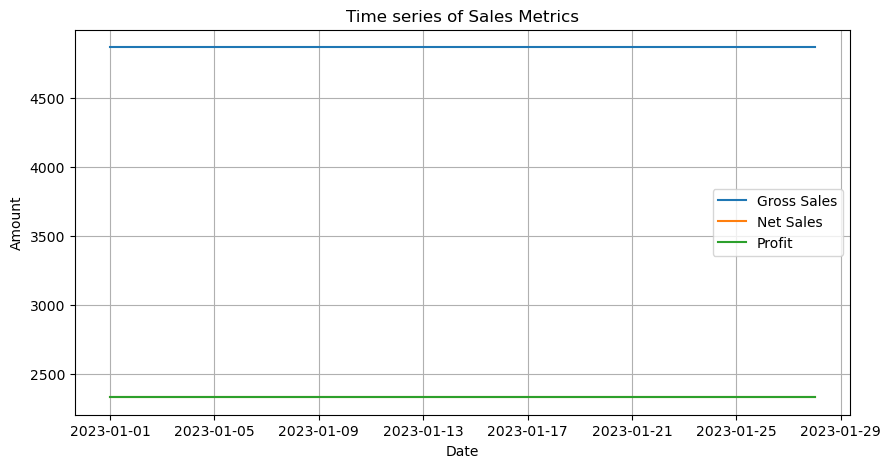

In [3]:
# Convert date and plot time series
df['date'] = pd.to_datetime(df['date'])
ts = df.groupby('date')[['gross_sales','net_sales','profit']].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(ts['date'], ts['gross_sales'], label='Gross Sales')
plt.plot(ts['date'], ts['net_sales'], label='Net Sales')
plt.plot(ts['date'], ts['profit'], label='Profit')
plt.legend()
plt.title('Time series of Sales Metrics')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


## Suggested Research Questions (pick 1-2)
1. How do manufacturing and freight costs affect net sales and profit over time?
2. Is there seasonality or clear trends in gross/net sales across the sample period?
3. Which cost component (COGS, manuf, freight) contributes most to margin variability?


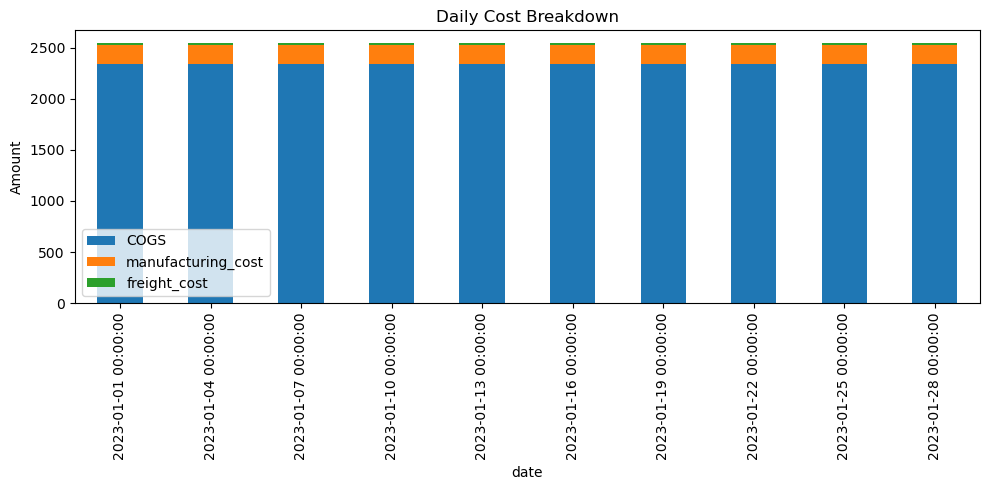

In [4]:
# Cost breakdown plot
costs = df.groupby('date')[['COGS','manufacturing_cost','freight_cost']].sum().reset_index()
costs = costs.set_index('date')
costs.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Daily Cost Breakdown')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


## Exporting results
- Save cleaned data to `/outputs`
- Save figures to `/outputs`


In [5]:
OUT = Path('../outputs')
OUT.mkdir(parents=True, exist_ok=True)
df.to_csv(OUT / 'cleaned_sales.csv', index=False)
print('Saved cleaned dataset to', OUT / 'cleaned_sales.csv')


Saved cleaned dataset to ..\outputs\cleaned_sales.csv
